# Decision tree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("../Data/Hitters.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [4]:
df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

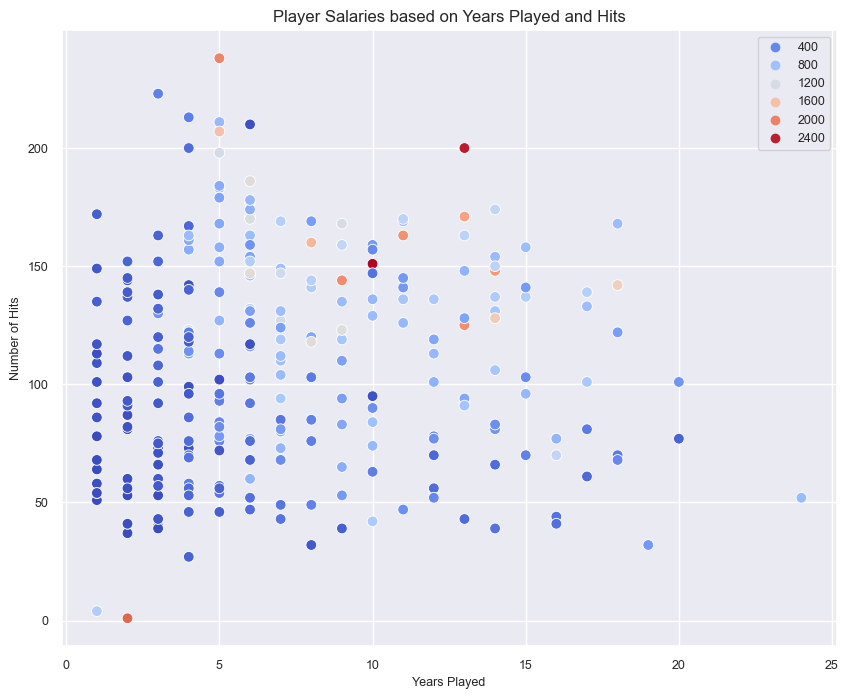

In [5]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 8))

scatterplot = sns.scatterplot(data=df, x="Years", y="Hits", hue="Salary", palette="coolwarm", s=60)

scatterplot.set_xlabel("Years Played", fontsize=9)
scatterplot.set_ylabel("Number of Hits", fontsize=9)
scatterplot.set_title("Player Salaries based on Years Played and Hits", fontsize=12)

plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.legend(fontsize=9)

plt.show()

#EDA goes here

## from sklearn.tree import DecisionTreeRegressor

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html">Documentation</a>

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

#max_depth kan ingå i crossvaldation
#min_sample_split
#min_sample_leaf

model = DecisionTreeRegressor(max_depth=2)
X, y = df[["Years", "Hits"]], df["Salary"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((210, 2), (53, 2), (210,), (53,))

In [8]:
model.fit(X_train, y_train)
model.feature_importances_

array([0.58742156, 0.41257844])

Max depth 4: Något högre importance för första feature jämfört med andra feature (Salary).<br>
Max depth 2: Betydligt högre importance för första feature jämfört med andra feature (Salary).

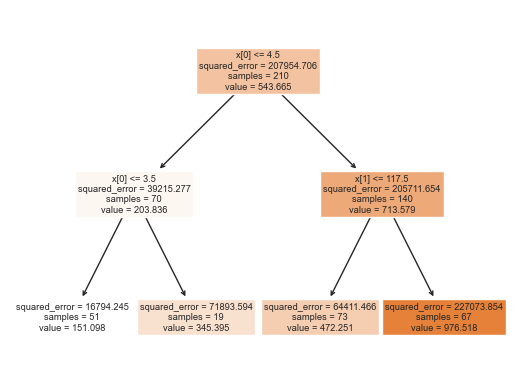

In [9]:
from sklearn import tree
tree.plot_tree(model, filled=True);

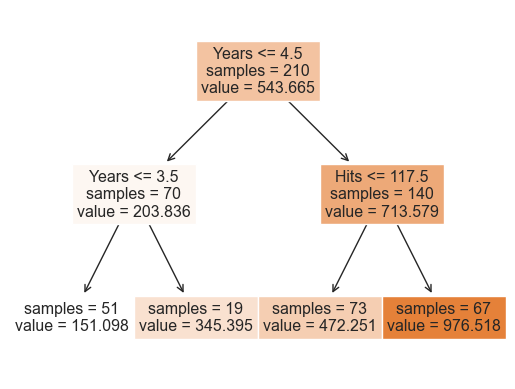

In [10]:
tree.plot_tree(model, filled=True, feature_names=X_train.columns, impurity=False);

4 terminal nodes

In [11]:
model = DecisionTreeRegressor(max_depth=8)
X, y = df[["Years", "Hits"]], df["Salary"]

model.fit(X_train, y_train)
model.feature_importances_

array([0.44238632, 0.55761368])

[Text(0.4973404255319149, 0.9444444444444444, 'Years <= 4.5\nsamples = 210\nvalue = 543.665'),
 Text(0.26861702127659576, 0.8333333333333334, 'Years <= 3.5\nsamples = 70\nvalue = 203.836'),
 Text(0.14716312056737588, 0.7222222222222222, 'Hits <= 20.5\nsamples = 51\nvalue = 151.098'),
 Text(0.1400709219858156, 0.6111111111111112, 'samples = 1\nvalue = 920.0'),
 Text(0.15425531914893617, 0.6111111111111112, 'Hits <= 105.5\nsamples = 50\nvalue = 135.72'),
 Text(0.0797872340425532, 0.5, 'Hits <= 56.5\nsamples = 32\nvalue = 101.609'),
 Text(0.03546099290780142, 0.3888888888888889, 'Years <= 2.5\nsamples = 11\nvalue = 79.136'),
 Text(0.02127659574468085, 0.2777777777777778, 'Hits <= 55.0\nsamples = 7\nvalue = 72.929'),
 Text(0.014184397163120567, 0.16666666666666666, 'Hits <= 53.5\nsamples = 6\nvalue = 70.083'),
 Text(0.0070921985815602835, 0.05555555555555555, 'samples = 4\nvalue = 69.375'),
 Text(0.02127659574468085, 0.05555555555555555, 'samples = 2\nvalue = 71.5'),
 Text(0.02836879432624

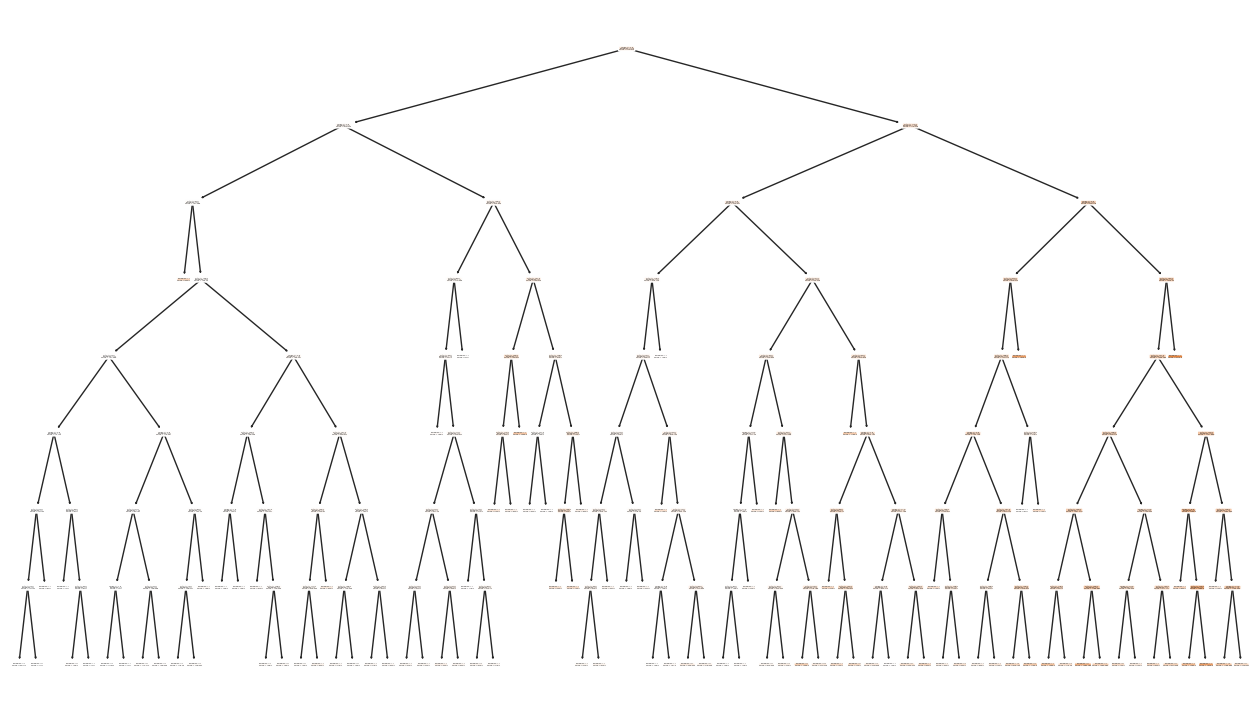

In [12]:
fig = plt.figure(figsize = (16,9))
tree.plot_tree(model, filled=True, feature_names=X_train.columns, impurity=False, rounded=True)

In [13]:
plt.figure(figsize=(20, 30))

sns.set(style="darkgrid", palette="coolwarm")

#tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=['0', '1'], rounded=True, fontsize=8, impurity=False, node_ids=False, proportion=True, precision=0)
#plt.show()

<Figure size 2000x3000 with 0 Axes>

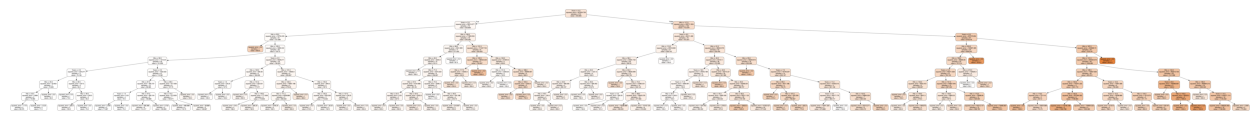

In [14]:
# DOT format
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(model, out_file=None, feature_names=X.columns, class_names=['0', '1'], rounded=True, filled=True)

# Visualize decision tree using Graphviz
graph = graphviz.Source(dot_data, format='png')
graph.render('tree', format='png')

# Display decision tree image
image = plt.imread('tree.png')
plt.figure(figsize=(16, 10))
plt.imshow(image)
plt.axis('off')
plt.show()


In [15]:
model = DecisionTreeRegressor(max_depth=2)
X, y = df[["Years", "Hits"]], df["Salary"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

model.fit(X_train, y_train)
model.feature_importances_

array([0.58742156, 0.41257844])

In [16]:
print(tree.export_text(model, feature_names= list(X_train.columns)))

# TODO: parse this text and extract predictors and their threshold

|--- Years <= 4.50
|   |--- Years <= 3.50
|   |   |--- value: [151.10]
|   |--- Years >  3.50
|   |   |--- value: [345.39]
|--- Years >  4.50
|   |--- Hits <= 117.50
|   |   |--- value: [472.25]
|   |--- Hits >  117.50
|   |   |--- value: [976.52]



In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)
MAE = mean_absolute_error(y_test, y_pred)

MSE = mean_squared_error(y_test, y_pred)

RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

MAE, MSE, RMSE

(235.0067581537342, 144165.4034360134, 379.69119483603174)

In [18]:
percentage_RMSE = RMSE/np.mean(y_test)
percentage_RMSE

0.7514724754676467

## Decision tree for classification

In [22]:
df = pd.read_csv("../Data/Default.csv")

# Decision in sklearn cannot handle categorical variables
df = pd.get_dummies(df, drop_first=True)

df.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


In [20]:
X, y, df.drop("default_Yes", axis="columns"), df["default_Yes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((210, 2), (53, 2))

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test,y_pred))

ValueError: Unknown label type: 'continuous'

In [ ]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test,y_pred))

ValueError: Unknown label type: 'continuous'